In [58]:
import pandas as pd
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns; sns.set()
from cycler import cycler
import re

<h3>Import DataFrame</h3>

In [59]:
temp_df = pd.read_csv('../data/modified/state_temperatures.csv')

<h3>DataFrame</h3>

In [60]:
temp_df

,Unnamed: 0,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,0,81,83,89,92,99.0,106,107,105,102,94,85,80,107
1,1,77,83,88,92,96.0,106,105,105,101,91,84,79,106
2,2,84,84,89,94,100.0,103,104,105,99,93,87,81,105
3,3,83,85,89,94,98.0,105,105,106,101,100,88,85,106
4,4,50,49,51,69,77.0,85,84,82,73,64,54,48,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,258,95,96,95,95,93.0,95,91,92,92,94,95,94,96
259,259,94,96,94,94,94.0,94,95,97,96,95,98,95,98
260,260,94,95,96,94,93.0,93,92,96,93,92,91,93,96
261,261,94,96,93,96,96.0,97,94,95,96,96,94,94,97


<h3>Drop First Column from previous Index Reset</h3>

In [61]:
temp_df = temp_df.drop(columns='Unnamed: 0')

<h3>New DataFrame</h3>

In [62]:
temp_df

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,81,83,89,92,99.0,106,107,105,102,94,85,80,107
1,77,83,88,92,96.0,106,105,105,101,91,84,79,106
2,84,84,89,94,100.0,103,104,105,99,93,87,81,105
3,83,85,89,94,98.0,105,105,106,101,100,88,85,106
4,50,49,51,69,77.0,85,84,82,73,64,54,48,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,95,96,95,95,93.0,95,91,92,92,94,95,94,96
259,94,96,94,94,94.0,94,95,97,96,95,98,95,98
260,94,95,96,94,93.0,93,92,96,93,92,91,93,96
261,94,96,93,96,96.0,97,94,95,96,96,94,94,97


In [63]:
# temp_df.to_csv('../data/modified/state_temperatures.csv')

<h3>Set DataFrame Columns to Variable</h3>

In [64]:
temp_cols = temp_df.columns.values

<h3>DataFrame Description</h3>

In [65]:
temp_description = temp_df.describe()
temp_description

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
count,263.000000,263.000000,263.000000,263.000000,189.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,72.980989,75.992395,84.330798,90.992395,95.455026,101.939163,103.045627,101.935361,98.840304,91.000000,80.950570,74.186312,104.239544
std,11.873523,12.143855,11.075422,9.294582,8.681378,7.670461,7.845223,7.810226,8.983720,9.698509,10.569717,11.495746,7.643764
min,36.000000,36.000000,34.000000,42.000000,47.000000,62.000000,65.000000,66.000000,61.000000,43.000000,39.000000,34.000000,66.000000
25%,66.000000,69.000000,82.000000,89.000000,93.000000,98.500000,100.000000,99.000000,97.000000,89.000000,77.000000,68.000000,101.000000
50%,74.000000,76.000000,87.000000,93.000000,96.000000,103.000000,104.000000,103.000000,100.000000,93.000000,83.000000,75.000000,105.000000
75%,81.000000,85.000000,90.000000,95.000000,100.000000,106.000000,108.000000,107.000000,104.000000,96.000000,87.000000,82.000000,109.000000
max,95.000000,100.000000,106.000000,107.000000,113.000000,122.000000,121.000000,117.000000,118.000000,111.000000,101.000000,95.000000,122.000000


In [66]:
# temp_description.to_csv('../data/modified/2015_temp_description.csv')

<h3>Next DataFrame</h3>

In [67]:
# ann_mean = pd.read_csv('../data/modified/annual_mean_temp.csv')

In [70]:
# ann_mean = ann_mean.drop(columns='Unnamed: 0')

In [71]:
ann_mean.head(10)

,STATE,ANN
0,AK,87.55
1,AL,106.00
2,AR,114.50
3,AZ,111.75
4,CA,110.15
5,CO,103.20
6,CT,103.00
7,DC,105.00
8,DE,103.00
9,FL,101.67


In [72]:
ann_mean.describe()

,ANN
count,53.000000
mean,104.845472
std,5.516487
min,87.000000
25%,102.710000
50%,106.000000
75%,107.140000
max,114.500000


<h3>Checking Annual AVG</h3>

In [73]:
annual_avg = ann_mean['ANN'].sum() / ann_mean.count()
annual_avg = np.round(annual_avg, decimals = 2)
annual_avg = annual_avg.loc['ANN']
annual_avg

104.85

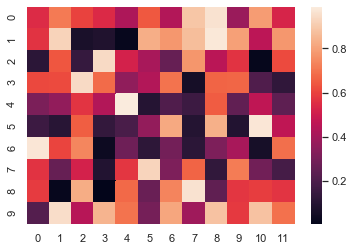

In [74]:
uniform_data = np.random.rand(10,12)
ax = sns.heatmap(uniform_data)

<h3>Drop First Column from previous Index Reset</h3>